### Data Wrangling and Feature Analysis

In [24]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize 


# POST request for token
response = requests.post('https://auth.domain.com.au/v1/connect/token', data = {'client_id':'client_35b83038a8764c9eb1924a166cee2481',"client_secret":"secret_310ddda5a2e167edc8b46c4b98273546","grant_type":"client_credentials","scope":"api_salesresults_read","Content-Type":"text/json"})
token = response.json()
print(token)
access_token = token["access_token"]

# GET Request for ID
url = "https://api.domain.com.au/v1/salesResults/Melbourne/listings"
auth = {"Authorization":"Bearer "+ access_token}

request = requests.get(url,headers = auth)
response=request.json()
print(response)


{'access_token': '6ac891ef9f63ad2c3a1adae04588c695', 'expires_in': 43200, 'token_type': 'Bearer'}
[{'streetNumber': '32', 'streetName': 'Albert', 'streetType': 'St', 'suburb': 'Abbotsford', 'postcode': '3067', 'state': 'Vic', 'geoLocation': {'latitude': -37.8088478, 'longitude': 144.999534}, 'propertyType': 'Townhouse', 'bedrooms': 3, 'bathrooms': 2, 'carspaces': 2, 'result': 'AUPN', 'agent': 'B&S Richmond', 'id': 2014972309, 'agencyId': 3355, 'agencyName': 'Biggin & Scott Richmond', 'agencyProfilePageUrl': 'http://www.domain.com.au/Real-Estate-Agencies/bigginscottrichmond-3355', 'propertyDetailsUrl': 'https://www.domain.com.au/32-albert-street-abbotsford-vic-3067-2014972309'}, {'unitNumber': '9', 'streetNumber': '42-44', 'streetName': 'Nicholson', 'streetType': 'St', 'suburb': 'Abbotsford', 'postcode': '3067', 'state': 'Vic', 'geoLocation': {'latitude': -37.808355, 'longitude': 144.996461}, 'propertyType': 'Unit', 'bedrooms': 2, 'bathrooms': 1, 'carspaces': 1, 'result': 'AUSP', 'agent

In [2]:
### Checking the number of records received in response.
df_response = json_normalize(response)
print (df_response)

    agencyId                     agencyName  \
0      20503           Belle Property Ascot   
1      21328         Belle Property Wilston   
2      17641                  Master Agents   
3       3804                     Place West   
4       5566           Ray White Paddington   
5       5566           Ray White Paddington   
6      29232                Harcourts Nexus   
7       4702  Place Estate Agents - Bulimba   
8      23127        Ray White East Brisbane   
9      22557             Harringtons Realty   
10      3677     RE/MAX Profile Real Estate   
11     20026            Ray White Redcliffe   
12     11958      Harcourts Property Centre   
13     23038        Ray White Stones Corner   
14      5566           Ray White Paddington   
15     17641                  Master Agents   
16     30777  Denovans Real Estate | Grange   
17     24620       Belle Property Coorparoo   
18     21778      Glenn Gracie Real Estate    
19     13574            Harcourts Clayfield   
20     11970 

#### Since there are less number of records received via API call, we will use the CSV file of Australian real estate data to proceed further with the analysis.

In [3]:
dictionary = pd.read_csv('data/MELBOURNE_HOUSE_PRICES_LESS.csv')
main       = pd.read_csv("data/Melbourne_housing_FULL.csv")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)
print(main_df.info())
print(main_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

#### Dataset of the Features
Based on the data points present in the Main Excel, listed below are the column considered in feature selection.

(1) Suburb 

(2) Rooms

(3) Type 

(4) Price 

(5) Bathroom 

(6) Car 

(7) Landsize 

(8) BuildingArea 

(9) CouncilArea 

(10) Regionname


In [4]:
# There are nearly 35K records in the CSV file and so we will use this data for
# further analysis and to build the ML Model
print(main_df.head())


       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode      ...       Bathroom  Car  Landsize  \
0  3/09/2016       2.5    3067.0      ...            1.0  1.0     126.0   
1  3/12/2016       2.5    3067.0      ...            1.0  1.0     202.0   
2  4/02/2016       2.5    3067.0      ...            1.0  0.0     156.0   
3  4/02/2016       2.5    3067.0      ...            2.0  1.0       0.0   
4  4/03/2017       2.5    3067.0      ...            2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea Lattitude  Longtitude  \
0           NaN        NaN

#### Analyse the jointplot to check the data points

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


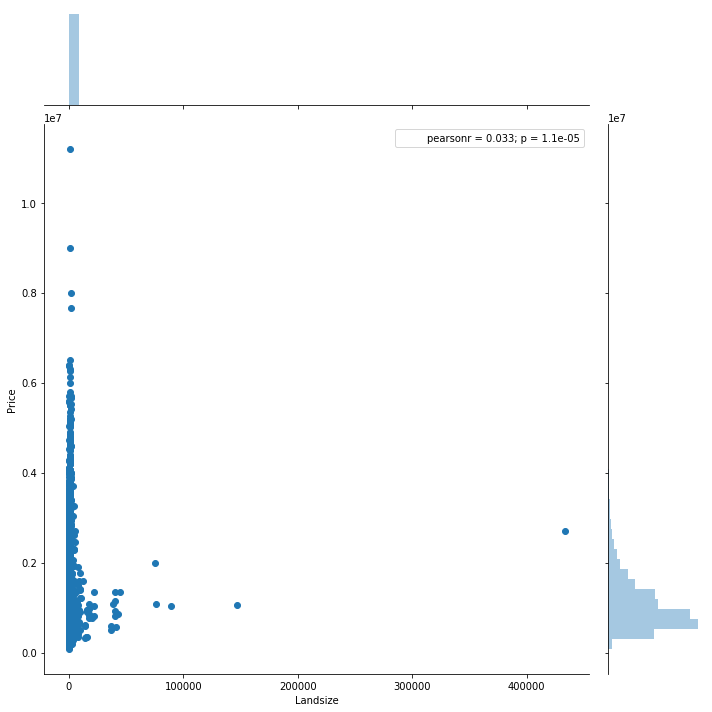

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x='Landsize', y='Price', data=main_df, size=10)
plt.show()

#### Introduce conditions to smoothen the distribution by removing extreme values from our data.

In [7]:
len(main_df[main_df['Landsize'] > 2000])

361

In [8]:
len(main_df[main_df['Price'] > 2000000])

1866

In [9]:
len(main_df[main_df['Rooms'] > 6])

65

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


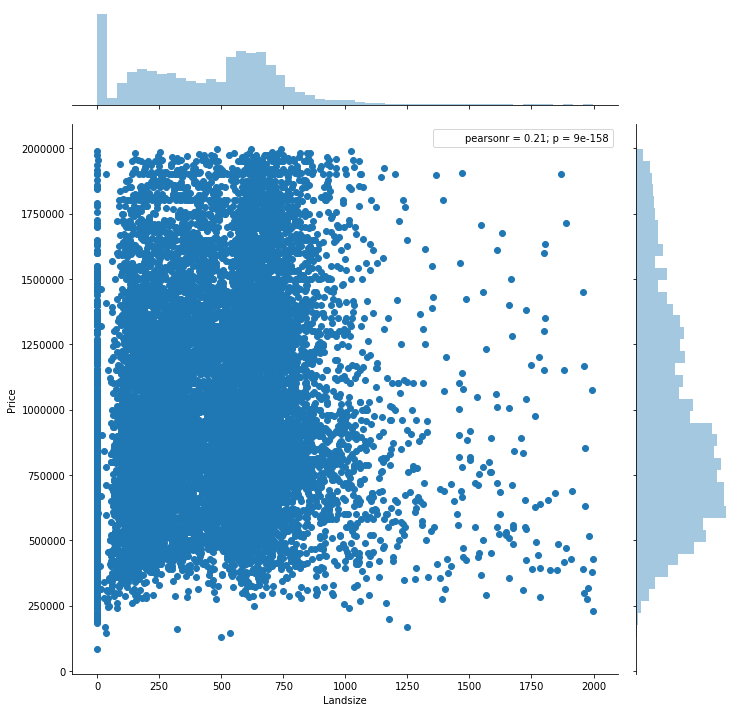

In [10]:
main_df = main_df[main_df['Landsize'] < 2000]
main_df = main_df[main_df['Price'] < 2000000]
main_df = main_df[main_df['Rooms'] < 8]

sns.jointplot(x='Landsize', y='Price', data=main_df, size=10)
plt.show()

Above plot suggests that the count of houses is high in the price range of 7,50,000 to 1 Million.

#### Exploring other features such as 'Number of Rooms', 'Region name' and 'Council Area'

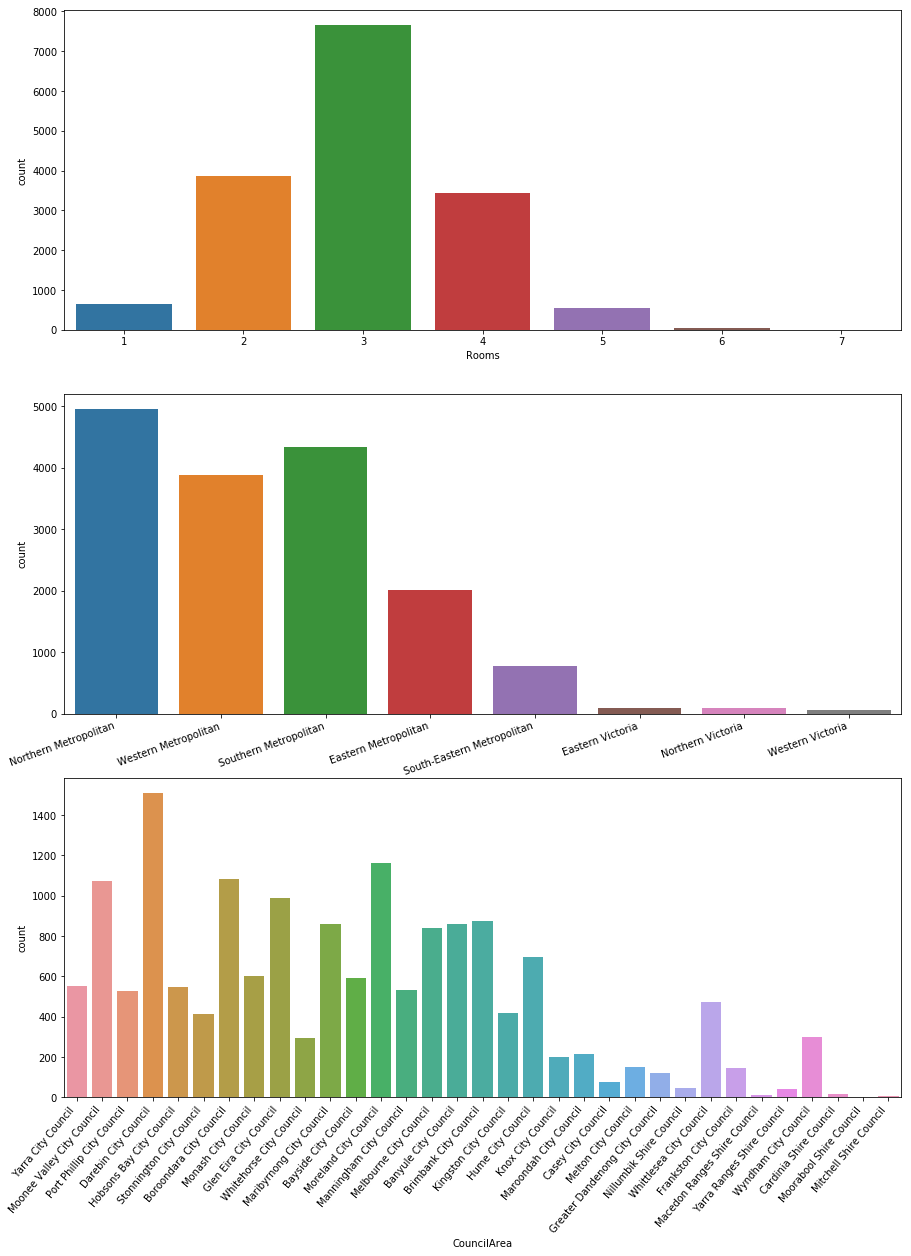

In [20]:
fig, ax =plt.subplots(3,1, figsize=(15,20))
sns.countplot(main_df['Rooms'], ax=ax[0])

sns.countplot(main_df['Regionname'], ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=20, ha="right")


sns.countplot(main_df['CouncilArea'], ax=ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=50, ha="right")
plt.show()

Based on the above plots, we could infer that:
    1) DareBin,  Moonee Valley, Boroondata, and Moreland City are the primary city councils with highest 
       count of houses.
    2) Number of 3 bedroom houses are double the number of 2/4 bedroom houses. So the preference when building/ buying
       a house seems to be 3 bedroom one.
        

#### Influence of 'Number of Rooms' on Price of the house.

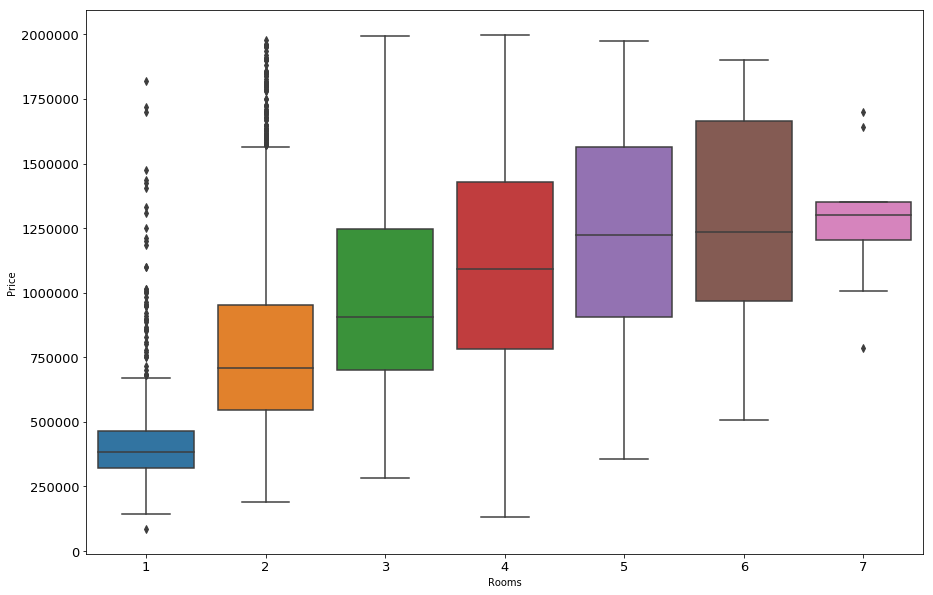

In [11]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Rooms', y='Price', data = main_df)
ax.tick_params(labelsize=13)
plt.show()

1) It looks like the feature 'Number of Rooms' varies directly with the price of the house.

2) One more interesting insight is that both 5 and 6 bedroom houses are competing in the same price range.

#### Valuation of CouncilArea with respect to Price

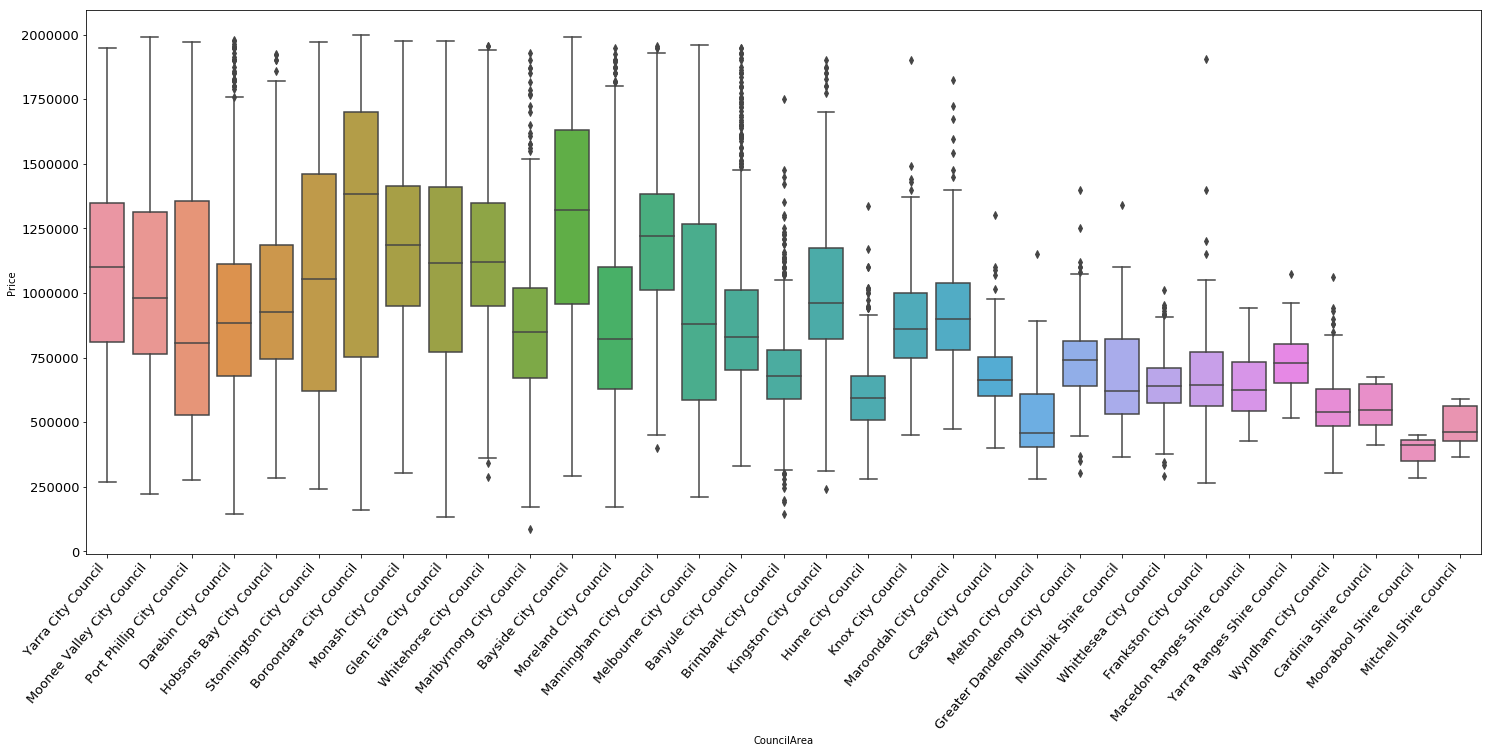

In [23]:
plt.figure(figsize=(25,10))
ax = sns.boxplot(x='CouncilArea', y='Price', data = main_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=13)
plt.show()

On analysing the above plot, we could infer that:

    1) Baroondara city council has the highest median price whereas Moorabook shire council has the lowest.
    2) Both Whitehorse city and Maribrynong city council have the same price range. 
    
    
By removing some extreme values, we can get better insights on the features.

#### Analyse and compare the histogram results

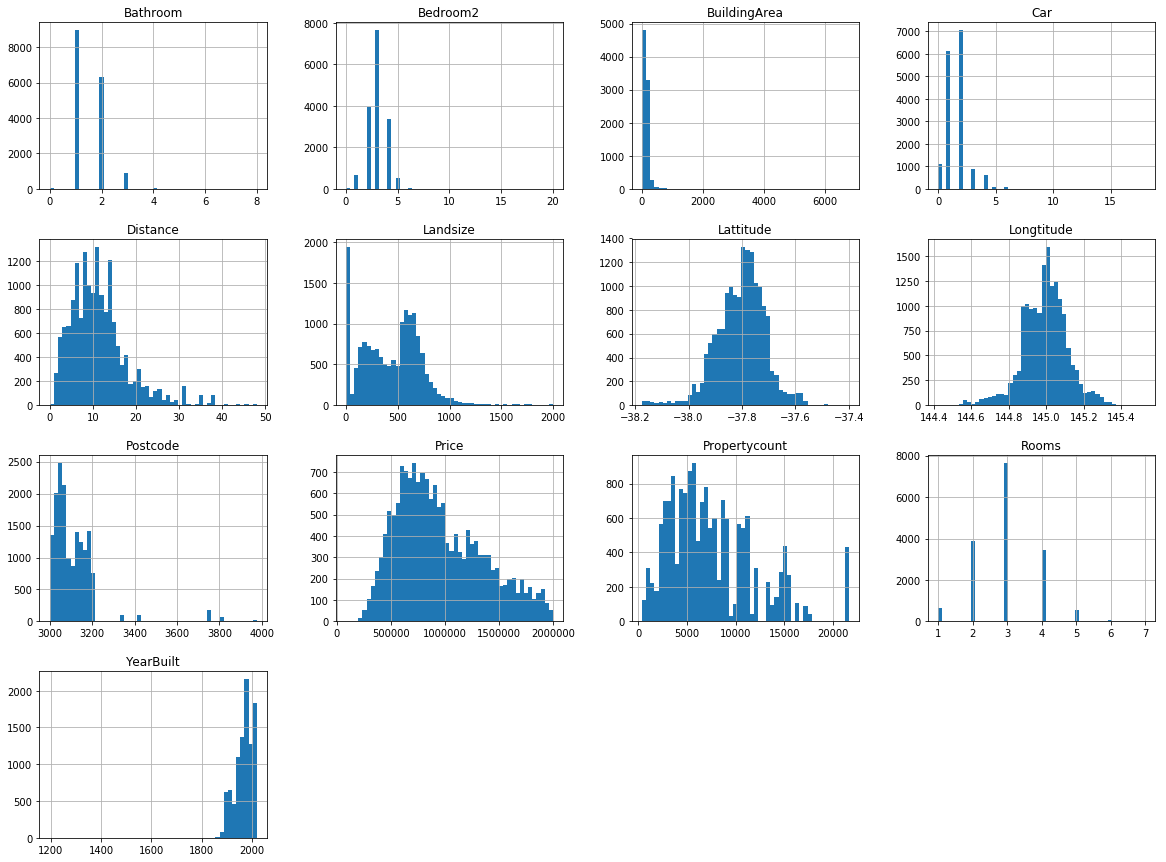

In [25]:
%matplotlib inline

main_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Based on the above results, 

    1) 3 bedroom houses with the provision to park 2-3 cars are mostly preferred.
    2) Houses nearer to the city are mostly preferred (or) Most houses are built near the city based on the results in the plot of 'Distance'
    3) There is a preference for the landsize in the range of 500 to 700 m2.
    

#### Analysis of Heat maps to find the correlation between features and the Target

Price            1.000000
Rooms            0.402590
Bedroom2         0.385279
Bathroom         0.302126
Longtitude       0.242001
BuildingArea     0.238583
Landsize         0.207768
Car              0.145257
Postcode         0.009676
Propertycount   -0.075756
Distance        -0.227055
Lattitude       -0.232182
YearBuilt       -0.378560
Name: Price, dtype: float64


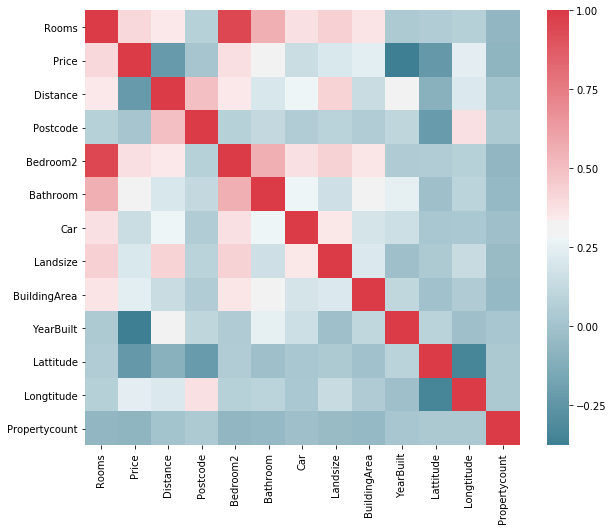

In [51]:
import seaborn as sns
import numpy as np
# Finding the positive/negative correlation between the different features and the success indicators
#main_model = main_model.fillna(0)
corr_matrix = main_df.corr()
print(corr_matrix["Price"].sort_values(ascending=False))
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Based on the heatmap results:
    
    1) Features such as 'No. of rooms', 'No. of Bathrooms', 'Building area' and 'PostCode' (location) has a positive correlation with the price.
    2) Feature 'Number of Rooms' has the highest percentage of correlation with Target among other features.
    

### Summary:
Listed below are some of the deductions made:

1) Location and Distance are important in determining the price range besides another feature'Number of rooms'.

2) 3 Bedroom houses (with 2-3 car parking availability) is the most preferred among the buyers.

3) Baroondara city council has the highest median price whereas Moorabook shire council has the lowest.

4) Both 5 and 6 bedroom houses compete in the same price range.

5) There are more houses in the price range of 750000 to 1 Million.